In [14]:
import torch
import matplotlib.pyplot as plt
import math
from scipy.interpolate import make_interp_spline
import numpy as np

In [2]:
mass = 10e5 #kg
stiffness = 10e10 #kN/m
k = stiffness

In [3]:
M=torch.eye(4,4)*mass

In [4]:
K=torch.tensor([[k,-k,0,0],[-k, 2*k, -k, 0],[0, -k, 2*k, -k],[0,0,-k,2*k]])

In [5]:
#dynamic matrix
D=torch.mm(M,K)

In [6]:
L,V = torch.linalg.eig(D)
print(L)
print(V)

tensor([1.2061e+16+0.j, 1.0000e+17+0.j, 2.3473e+17+0.j, 3.5321e+17+0.j])
tensor([[-6.5654e-01+0.j,  5.7735e-01+0.j, -4.2853e-01+0.j, -2.2801e-01+0.j],
        [-5.7735e-01+0.j,  1.1302e-07+0.j,  5.7735e-01+0.j,  5.7735e-01+0.j],
        [-4.2853e-01+0.j, -5.7735e-01+0.j,  2.2801e-01+0.j, -6.5654e-01+0.j],
        [-2.2801e-01+0.j, -5.7735e-01+0.j, -6.5654e-01+0.j,  4.2853e-01+0.j]])


In [38]:
def graph_mode(V,L,mode):
    # display mode shape on graph
    x=V[:,mode-1]
    x = torch.cat((x,torch.zeros(1)))
    x=torch.real(x)
    print(x)
    x = x/max(abs(x))
    ax = plt.gca()
    ax.set_aspect('equal')
    mat_size = V.size()[0]
    y = torch.linspace(0,mat_size+1,mat_size+1)  
    plt.plot(x,y)
    plt.title(f"mode: {mode}")
    
    period = 2*math.pi/torch.sqrt(torch.real(L))
    print(f"Period: {period[mode-1]}s")


tensor([ 0.1209, -0.3510,  0.7832, -0.4988,  0.0000])
Period: 8.204615592956543s


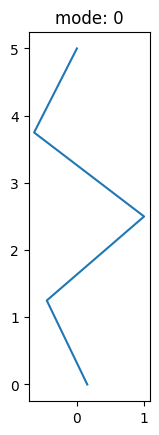

In [43]:
# 4 story example
Mass=torch.eye(4)*torch.tensor([[1],[2],[2],[3]])*1500.0
Stiff = torch.tensor([[1,-1,0,0],[-1,3,-2,0],[0,-2,5,-3],[0,0,-3,7]])*800.0
D=torch.mm(torch.inverse(Mass),Stiff)
L,V = torch.linalg.eig(D)
graph_mode(V,L,0)

tensor([0.6061, 0.7954, 0.0000])
Period: 0.20459967851638794s


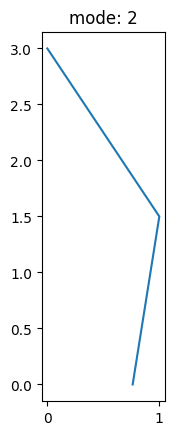

In [33]:
# 2 story example
M = torch.Tensor([[20.39,0],[0,15.29]])
K = torch.Tensor([[98740, -60587],[-60587,60587]])
D = torch.mm(torch.inverse(M),K)
L,V = torch.linalg.eig(D)
graph_mode(V,L,2)

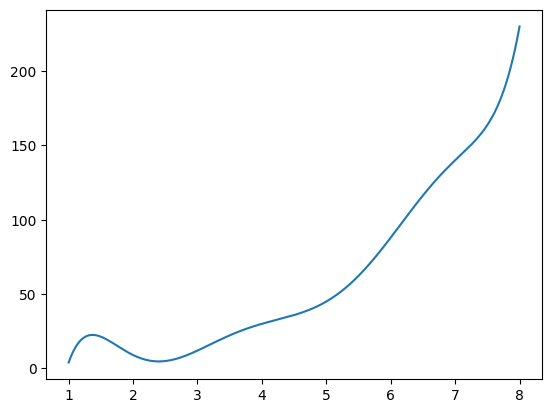

In [25]:
from scipy.interpolate import make_interp_spline, BSpline

#create data
x = np.array([1, 2, 3, 4, 5, 6, 7, 8])
y = np.array([4, 9, 12, 30, 45, 88, 140, 230])

#define x as 200 equally spaced values between the min and max of original x 
xnew = np.linspace(x.min(), x.max(), 200) 

#define spline with degree k=7
spl = make_interp_spline(x, y, k=7)
y_smooth = spl(xnew)

#create smooth line chart 
plt.plot(xnew, y_smooth)
plt.show()